# 0. Import the data and python libraries

In [3]:
# Import required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [4]:
# import the data
data = pd.read_csv('car_insurance.csv', index_col='id')
data.head()

,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
id,,,,,,,,,,,,,,,,,
569520,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
750365,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
199901,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
478866,0,1,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
731664,1,1,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


# 1. Exploring Dataset

In [5]:
data.info() #missing values and dtypes

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 569520 to 442696
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  10000 non-null  int64  
 1   gender               10000 non-null  int64  
 2   driving_experience   10000 non-null  object 
 3   education            10000 non-null  object 
 4   income               10000 non-null  object 
 5   credit_score         9018 non-null   float64
 6   vehicle_ownership    10000 non-null  float64
 7   vehicle_year         10000 non-null  object 
 8   married              10000 non-null  float64
 9   children             10000 non-null  float64
 10  postal_code          10000 non-null  int64  
 11  annual_mileage       9043 non-null   float64
 12  vehicle_type         10000 non-null  object 
 13  speeding_violations  10000 non-null  int64  
 14  duis                 10000 non-null  int64  
 15  past_accidents       10000 non-null

## 1.1 Filling missing values

In [6]:
# % Ratio of missing values
missing_values = data.isnull().mean()
missing_values = missing_values[missing_values > 0]*100
missing_values

credit_score      9.82
annual_mileage    9.57
dtype: float64

In [7]:
data[missing_values.index] = data[missing_values.index].fillna(data[missing_values.index].mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 569520 to 442696
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  10000 non-null  int64  
 1   gender               10000 non-null  int64  
 2   driving_experience   10000 non-null  object 
 3   education            10000 non-null  object 
 4   income               10000 non-null  object 
 5   credit_score         10000 non-null  float64
 6   vehicle_ownership    10000 non-null  float64
 7   vehicle_year         10000 non-null  object 
 8   married              10000 non-null  float64
 9   children             10000 non-null  float64
 10  postal_code          10000 non-null  int64  
 11  annual_mileage       10000 non-null  float64
 12  vehicle_type         10000 non-null  object 
 13  speeding_violations  10000 non-null  int64  
 14  duis                 10000 non-null  int64  
 15  past_accidents       10000 non-null

## 1.2 Correcting Data Types

In [8]:
# list of data types
dtype_list = {'age':'category',
              'gender':'category',
              'driving_experience':'category',
              'education':'category',
              'income':'category',
              'credit_score':'float64',
              'vehicle_ownership':'category',
              'vehicle_year':'category',
              'married':'category',
              'children':'category',
              'postal_code':'O',
              'annual_mileage':'float64',
              'vehicle_type':'category',
              'speeding_violations':'int32',
              'duis':'int32',
              'past_accidents':'int32',
              'outcome':'int32'}

In [9]:
# change data types
data = data.astype(dtype_list)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 569520 to 442696
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  10000 non-null  category
 1   gender               10000 non-null  category
 2   driving_experience   10000 non-null  category
 3   education            10000 non-null  category
 4   income               10000 non-null  category
 5   credit_score         10000 non-null  float64 
 6   vehicle_ownership    10000 non-null  category
 7   vehicle_year         10000 non-null  category
 8   married              10000 non-null  category
 9   children             10000 non-null  category
 10  postal_code          10000 non-null  object  
 11  annual_mileage       10000 non-null  float64 
 12  vehicle_type         10000 non-null  category
 13  speeding_violations  10000 non-null  int32   
 14  duis                 10000 non-null  int32   
 15  past_accidents    

In [10]:
# # of unique values in categorical data
categories = data.dtypes[data.dtypes == 'category'].index
unique_categories = data[categories].nunique()
unique_categories

age                   4
gender                2
driving_experience    4
education             3
income                4
vehicle_ownership     2
vehicle_year          2
married               2
children              2
vehicle_type          2
dtype: int64

## 1.3 Explatory Analysis

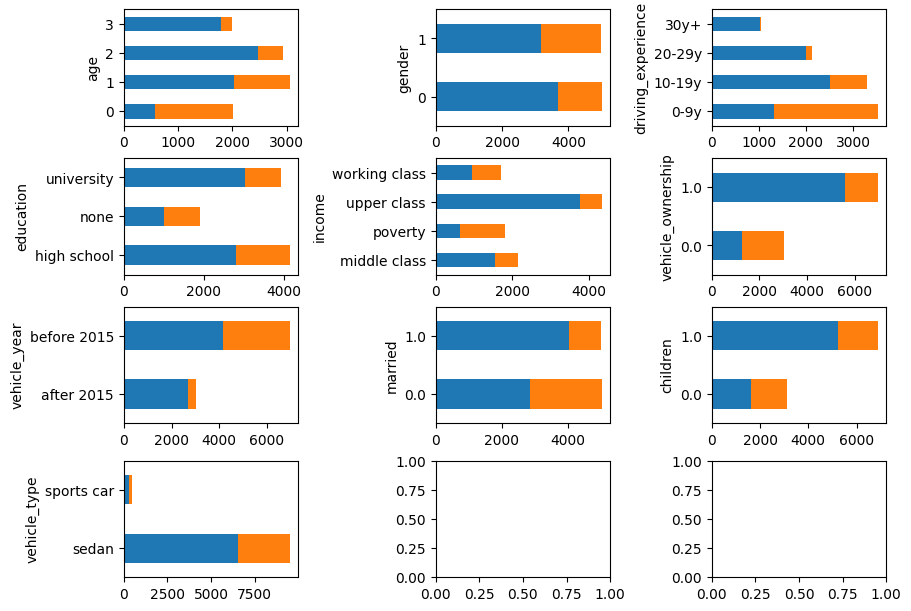

In [11]:
# ratio of outcome=1 in each category
fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(9, 6), layout="constrained")
i = 0
for cat in unique_categories.index:
    outcome_counts = data.groupby([cat,"outcome"], observed=False).outcome.value_counts()
    category_df = pd.DataFrame(outcome_counts).reset_index(names=[cat,"outcome"])
    category_pivot = category_df.pivot_table(index=cat, columns="outcome", values="count", observed=False)
    category_pivot.plot.barh(stacked=True, ax=axs[math.floor(i/3)][i % 3], legend=False)
    i += 1

# 3. Model (Simple Logistic Regression)

In [12]:
from statsmodels.formula.api import logit 

## 3.1 Numerical Feature Example

In [13]:
mdl_outcome_vs_credit_score = logit("outcome ~ credit_score", data=data).fit()
intercept, slope = mdl_outcome_vs_credit_score.params
print(mdl_outcome_vs_credit_score.params)

Optimization terminated successfully.
         Current function value: 0.572557
         Iterations 6
Intercept       1.950228
credit_score   -5.464491
dtype: float64


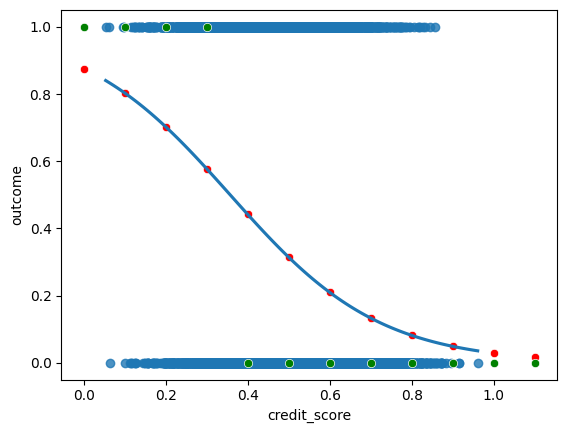

In [14]:
# Visualizing the logistic model
sns.regplot(x="credit_score", 
            y="outcome", 
            data=data, 
            ci=None, 
            logistic=True) 

explanatory_data = pd.DataFrame( 
  {"credit_score": np.arange(0.00, 1.2, 0.1)}) 

prediction_data = explanatory_data.assign( 
    outcome = mdl_outcome_vs_credit_score.predict(explanatory_data)) 

sns.scatterplot(x="credit_score", 
                y="outcome", 
                data=prediction_data, 
                color="red") 

sns.scatterplot(x="credit_score", 
                y="outcome2", 
                data = prediction_data.assign(outcome2 = np.round(prediction_data["outcome"])), 
                color="green") 
plt.show() 

In [15]:
conf_matrix = mdl_outcome_vs_credit_score.pred_table()
conf_matrix

array([[6321.,  546.],
       [2400.,  733.]])

In [16]:
confusion_matrix = np.array([["true negative","false positive"],
                    ["false negative","true positive"]])
print(confusion_matrix)

[['true negative' 'false positive']
 ['false negative' 'true positive']]


accuracy = (tn+tp)/(tn+fp+fn+tp)

In [17]:
accuracy = (conf_matrix[0][0] + conf_matrix[1][1])/conf_matrix.sum()
accuracy

0.7054

## 3.2 Ordinal CategoryExample

In [18]:
mdl_outcome_vs_driving_experience = logit("outcome ~ driving_experience", data=data).fit()
print(mdl_outcome_vs_driving_experience.params)

Optimization terminated successfully.
         Current function value: 0.467092
         Iterations 8
Intercept                       0.523840
driving_experience[T.10-19y]   -1.684447
driving_experience[T.20-29y]   -3.438382
driving_experience[T.30y+]     -4.467362
dtype: float64


## 3.3 Finding the best performing feature

In [19]:
data = pd.read_csv('car_insurance.csv', index_col='id')

In [20]:
models = []
features = data.drop('outcome', axis=1).columns
accuracies = []

In [23]:
for feature in features:
    model = logit(f"outcome ~ {feature}", data=data).fit()
    models.append(model)
    pred_table = model.pred_table()
    accuracy = (pred_table[0][0] + pred_table[1][1])/pred_table.sum()
    accuracies.append(accuracy)

Optimization terminated successfully.
         Current function value: 0.511794
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.615951
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.467092
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.603742
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.531499
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.567469
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.552412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572668
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.586659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595431
  

In [22]:
feature_accuracy = pd.DataFrame({"features":features,
                                 "accuracies":accuracies})
feature_accuracy.sort_values("accuracies", ascending=False)

,features,accuracies
2,driving_experience,0.777100
0,age,0.774700
4,income,0.742500
6,vehicle_ownership,0.735100
5,credit_score,0.706698
11,annual_mileage,0.693354
1,gender,0.686700
3,education,0.686700
7,vehicle_year,0.686700
8,married,0.686700
